In [ ]:
#cleaning data and ecploratory analysis
# monthly sales record of a business dealing in electronics

In [2]:
import os
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.listdir('C:\\Users\\muska\\visual\\archive')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv',
 'student_data.csv',
 'top_1000_instagrammers.csv']

In [8]:
files = [file for file in os.listdir('C:\\Users\\muska\\visual\\archive')[0:12]]

In [9]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [12]:
all_month_data=pd.DataFrame()
for file in files:
    data = pd.read_csv('C:\\Users\\muska\\visual\\archive\\'+file)
    all_month_data = pd.concat([all_month_data,data])

In [13]:
all_month_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [38]:
df=all_month_data

In [39]:
df.describe().T

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,24,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


In [132]:
#convert data

In [40]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors = 'coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors = 'coerce')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(2), object(4)
memory usage: 10.0+ MB


In [133]:
#convert data

In [42]:
from datetime import datetime

In [43]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors = 'coerce')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 10.0+ MB


In [45]:
df = df.dropna()

In [46]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [48]:
#categorical data

In [50]:
category_df = df[['Order ID','Product','Quantity Ordered','Order Date','Purchase Address']]

In [51]:
category_df

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1.0,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [63]:
category_df['Quantity Ordered'].value_counts()

1.0    168552
2.0     13324
3.0      2920
4.0       806
5.0       236
6.0        80
7.0        24
8.0         5
9.0         3
Name: Quantity Ordered, dtype: int64

In [64]:
#data for people who ordered the most quantity ie 8 and 9

In [126]:
top_quant = df.sort_values('Quantity Ordered',ascending=False)

In [114]:
#rearrange by most ordered quantity

In [127]:
top_quant

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3740,226483,AAA Batteries (4-pack),9.0,2.99,2019-07-20 23:28:00,"867 Sunset St, San Francisco, CA 94016"
1236,211097,AAA Batteries (4-pack),9.0,2.99,2019-06-23 08:29:00,"338 Hickory St, Los Angeles, CA 90001"
4376,227096,AAA Batteries (4-pack),9.0,2.99,2019-07-29 09:50:00,"60 10th St, San Francisco, CA 94016"
12809,291034,AAA Batteries (4-pack),8.0,2.99,2019-11-09 16:30:00,"268 Willow St, Dallas, TX 75001"
2185,261442,AAA Batteries (4-pack),8.0,2.99,2019-10-16 20:31:00,"36 Center St, Boston, MA 02215"
...,...,...,...,...,...,...
9859,159921,ThinkPad Laptop,1.0,999.99,2019-02-03 03:01:00,"794 Lake St, Los Angeles, CA 90001"
9860,159922,Apple Airpods Headphones,1.0,150.00,2019-02-10 18:20:00,"253 Forest St, Austin, TX 73301"
9861,159923,AA Batteries (4-pack),1.0,3.84,2019-02-20 18:48:00,"421 Chestnut St, San Francisco, CA 94016"
9862,159924,AAA Batteries (4-pack),1.0,2.99,2019-02-24 09:46:00,"779 Spruce St, Los Angeles, CA 90001"


In [142]:
for count in df.columns:
    print(df[count].value_counts())
    print('unique values are: ', df[count].value_counts().count())

160873    5
178158    4
277875    4
196615    4
304802    4
         ..
158177    1
158178    1
158179    1
158180    1
259357    1
Name: Order ID, Length: 178437, dtype: int64
unique values are:  178437
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64
unique values are:  19
1.0    168552
2.0     13324
3.0      2920
4.0       806
5.0  

In [141]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [143]:

    """
    Adding new features to
    our data, adding Month Data,
    Hour Data, Minute Data, Sales Data,
    and Cities Column
    
    Returning:
        data with new features
    """
    

In [187]:
def augment_data(data):
     # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    data['Year'] = data['Order Date'].dt.year
    data['Month']= data['Order Date'].dt.month
    data['Sales']=data['Price Each']*data['Quantity Ordered']
    data['Cities']=data['Purchase Address'].apply(lambda x: f"{get_city(x)} ,({get_state(x)})") 
    return data


In [188]:
sales_data = augment_data(df)

C:\Users\muska\AppData\Local\Temp\ipykernel_4264\4171435009.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Order Date'].dt.year
C:\Users\muska\AppData\Local\Temp\ipykernel_4264\4171435009.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']= data['Order Date'].dt.month
C:\Users\muska\AppData\Local\Temp\ipykernel_4264\4171435009.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [189]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,Cities,"Cities,State"
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,"Dallas ,(TX)","Dallas ,(TX)"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,"Boston ,(MA)","Boston ,(MA)"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,"Los Angeles ,(CA)","Los Angeles ,(CA)"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,"Los Angeles ,(CA)","Los Angeles ,(CA)"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,"Los Angeles ,(CA)","Los Angeles ,(CA)"
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,8.97,"Los Angeles ,(CA)","Los Angeles ,(CA)"
11682,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,700.00,"San Francisco ,(CA)","San Francisco ,(CA)"
11683,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,700.00,"San Francisco ,(CA)","San Francisco ,(CA)"
11684,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,379.99,"San Francisco ,(CA)","San Francisco ,(CA)"


In [190]:
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Year', 'Month', 'Sales', 'Cities', 'Cities,State'],
      dtype='object')

In [191]:
#data analysis

<AxesSubplot:>

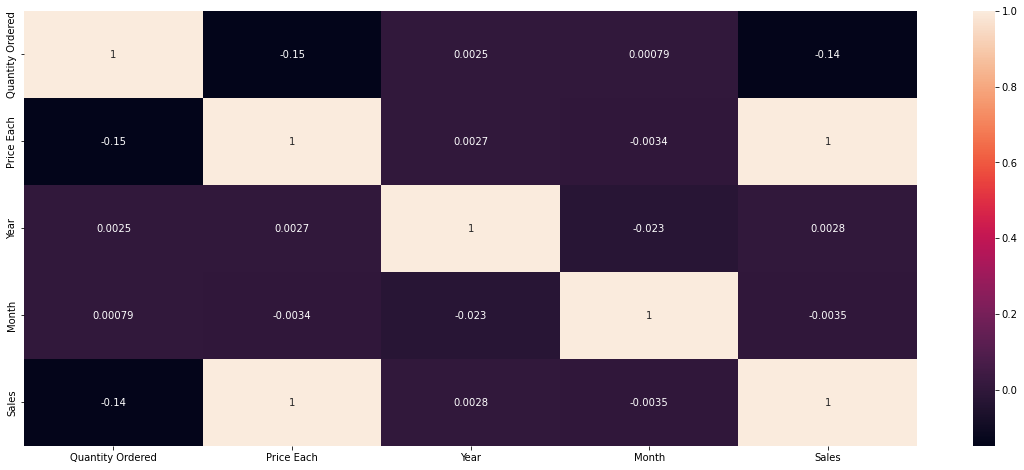

In [196]:
plt.figure(figsize=(20,8))
sns.heatmap(sales_data.corr(),annot=True)
#annot shows corr value

In [216]:
##correlation between sales nd rest of data
sales_data.corr()['Sales'].sort_values(ascending=False)

Sales               1.000000
Price Each          0.999203
Year                0.002824
Month              -0.003466
Quantity Ordered   -0.139417
Name: Sales, dtype: float64

In [ ]:
#groupby year

In [220]:
sales_data.groupby(['Year']).sum().astype('int')

,Quantity Ordered,Price Each,Month,Sales
Year,,,,
2019,209038,34280627,1312613,34483365
2020,41,8503,34,8670


In [ ]:
#groupby months

In [226]:
f=DataFrame(sales_data.groupby(['Month']).sum())


In [227]:
f

,Quantity Ordered,Price Each,Year,Sales
Month,,,,
1,10903.0,1811768.38,19602505,1822256.73
2,13449.0,2188884.72,24177525,2202022.42
3,17005.0,2791207.83,30593907,2807100.38
4,20558.0,3367671.02,36905301,3390670.24
5,18667.0,3135125.13,33446754,3152606.75
6,15253.0,2562025.61,27365526,2577802.26
7,16072.0,2632539.56,28857567,2647775.76
8,13448.0,2230345.42,24149259,2244467.88
9,13109.0,2084992.09,23462799,2097560.13


Text(0, 0.5, 'Sales in USD ($)')

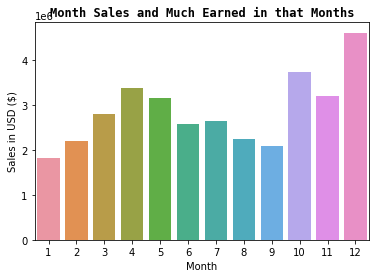

In [231]:
sns.barplot(x=f.index,y=f['Sales'],data=f)
plt.title('Month Sales and Much Earned in that Months', 
          fontname='monospace', weight='bold')
plt.ylabel('Sales in USD ($)')

In [235]:
# Which City had the highest number of sales?
c=sales_data.groupby(['Cities']).sum().astype('int')

<Figure size 2880x720 with 0 Axes>

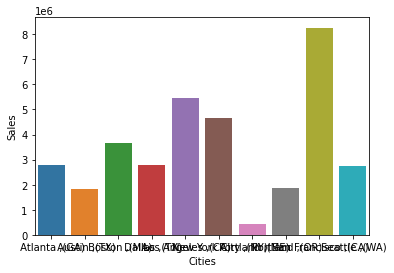

<Figure size 2880x720 with 0 Axes>

In [240]:
sns.barplot(x=c.index,y=c['Sales'],data=sales_data)
plt.figure(figsize=(40,10))